# **Esperimento di Frank-Hertz**

## **rumore a 50Hz**

Come primo passo dobbiamo osservare la presenza del rumore a 50 Hz nei segnali che generiamo.

In [13]:
import tdwf
import numpy as np
import time
import matplotlib.pyplot as plt

ad2 = tdwf.AD2()
wgen = tdwf.WaveGen(ad2.hdwf)

wgen.w1.func = tdwf.funcDC
wgen.w1.offs = 5
#wgen.w2.func = tdwf.funcDC
#wgen.w2.offs = 0
#wgen.w1.ampl = 
#wgen.w1.freq = 
wgen.w1.start()
#wgen.w2.sync()

scope = tdwf.Scope(ad2.hdwf)
scope.fs = 400e3
scope.npt = 8000
scope.ch1.rng = 5
scope.ch2.rng = 5
scope.ch1.avg = True
scope.ch2.avg = True

scope.trig(True, level=2, sour = tdwf.trigsrcCh1)

time.sleep(0.1)
scope.sample()

'''
nmeas = 1200
tt = []
data = []
t0 = time.time()


for i in range(nmeas):
    if i % 400 == 0:
        wgen.w1.offs = 4 - wgen.w1.offs        
    tt.append(time.time()-t0)
    data.append(np.mean(scope.ch1.vals))

for i in range(len(scope.time.vals)):
    if scope.ch1.vals[i] > 2.75:

        
plt.xlabel('Tempo [s]')
plt.ylabel('Corrente [$\mu$ A]')


plt.subplot(2, 1, 2)
plt.plot(tt, data, '.', color='blue')
plt.xlabel('Ripetizioni')
plt.ylabel('Corrente [$\mu$ A]')
'''
plt.plot(scope.time.vals, scope.ch1.vals, '.', color='blue')

plt.show()
'''
dati0 = np.column_stack((scope.time.vals, scope.ch1.vals))
np.savetxt(f'rumore_50Hz_Neon.txt', dati0, delimiter='\t')

dati = np.column_stack((tt, data))
np.savetxt(f'drift_Neon.txt', dati, delimiter='\t')
'''

Dispositivo #1 [SN:210321ABE379, hdwf=1] connesso!
Configurazione #1


KeyboardInterrupt: 

## **Spazzata in frequenza**


In [ ]:
import tdwf
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
import numpy as np
import scipy.optimize as so
import math
    
# -[Parametri di controllo]
nper = 10 # numero di periodi acquisiti  
nf = 101 # Numero di punti dell'array delle frequenze       
npt = 8000 # Numero di punti acquisiti per ogni singolo segnale
f0 = 1 # Estremo sinistro delle frequenze
f1 = 10 # Estremo destro delle frequenze
flag_return = False
flag_show = True

# Calcolo dei vettori
fv = np.logspace(np.log10(f0), np.log10(f1), nf) 

# -[Configurazione AD2]--------------------------------------------------------
#   1. Connessiene con AD2 e selezione configurazione 
ad2 = tdwf.AD2()

#   2. Configurazione generatore di funzioni
wavegen = tdwf.WaveGen(ad2.hdwf)
wavegen.w1.offs = 2.5
wavegen.w1.ampl = 2.5
wavegen.w1.func = tdwf.funcSine
wavegen.w1.start()

#   3. Configurazione oscilloscopio
scope = tdwf.Scope(ad2.hdwf)
scope.fs = 400e3
scope.npt = npt
scope.ch1.rng = 5

#-[Ciclo di misura]------------------------------------------------------------

#  Ciclo di misura
m=1 # Numero di prese dati
flag_first = True
I = np.full((nf, m), np.nan)

for ar in range(m):  
    print(f"ar = {ar+1}")
    for ii in range(len(fv)):  # frequency loop
        # Impostazione dlela frequenza e del sampling
        findex = ii
        ff = fv[findex]
        print(f'frequenza {ii}/{nf} = ', ff)

        # Decimation factor
        df = math.ceil(100e6*nper/(npt*ff))
        scope.fs = 100e6/df  # cambia f campionamento in base alla f del segnale
        #scope.npt = int(scope.fs*nper/ff)  # cambia numero di punti

        scope.trig(False, level=2, sour = tdwf.trigsrcCh1)
        wavegen.w1.freq = ff
        scope.sample()
            
        # Aggiornamento dei dati
        I[findex, ar] = np.mean(scope.ch1.vals)/1e6

    data = np.column_stack((fv, I[:, ar]))
    np.savetxt(f"risposta in frequenza 3.txt", data, delimiter='\t')

plt.plot(fv,I, '.-', color='blue')
plt.xlabel('Frequenza [Hz]')
plt.ylabel('Corrente [$\mu$ A]')
#plt.xscale('log')

plt.show()


ad2.close()


Dispositivo #1 [SN:210321ABE379, hdwf=1] connesso!
Configurazione #1
ar = 1
frequenza 0/101 =  1.0
frequenza 1/101 =  1.023292992280754
frequenza 2/101 =  1.0471285480508996
frequenza 3/101 =  1.0715193052376064
frequenza 4/101 =  1.096478196143185
frequenza 5/101 =  1.1220184543019633
frequenza 6/101 =  1.1481536214968828
frequenza 7/101 =  1.1748975549395295
frequenza 8/101 =  1.202264434617413
frequenza 9/101 =  1.2302687708123816
frequenza 10/101 =  1.2589254117941673
frequenza 11/101 =  1.288249551693134
frequenza 12/101 =  1.318256738556407
frequenza 13/101 =  1.3489628825916535
frequenza 14/101 =  1.3803842646028848
frequenza 15/101 =  1.4125375446227544
frequenza 16/101 =  1.4454397707459274
frequenza 17/101 =  1.4791083881682074
frequenza 18/101 =  1.5135612484362082
frequenza 19/101 =  1.5488166189124815
frequenza 20/101 =  1.5848931924611136
frequenza 21/101 =  1.62181009735893
frequenza 22/101 =  1.6595869074375607
frequenza 23/101 =  1.6982436524617444
frequenza 24/101 =  

## **Spazzata in voltaggio**


In [4]:
import tdwf
import matplotlib.pyplot as plt 
import numpy as np
import time

for j in range(10):
    V0 = 0 # Valore iniziale
    V1 = 4 # Valore finale
    nV = 1001 #Numero di punti
    npt = 8000 # Numero di punti
    fs = 400e3 # Frequenza di sample --> devo scegliere npt e fs in modo da ottenere un numero intero di periodi del rumore a 50 Hz
    Vv = np.linspace(V0, V1, nV)

    # Accensione
    ad2 = tdwf.AD2()
    ad2.vdd = 5
    ad2.vss = -5
    #ad2.power(True)

    # Connessiene e configurazione onde
    wgen = tdwf.WaveGen(ad2.hdwf)
    wgen.w1.func = tdwf.funcDC
    wgen.w1.offs = V0
    wgen.w1.start()

    #  Configurazione oscilloscopio
    scope = tdwf.Scope(ad2.hdwf)
    scope.fs=fs
    scope.npt=npt
    scope.ch1.rng = 5
    scope.ch1.avg = True # Mi permette di ridurre parzialmente il rumore del segnale

    # -[Ciclo di misura]-----------------------------------------------------------
    I = np.full((nV, 1), np.nan)

    for ii, V in enumerate(Vv):
        wgen.w1.offs = V
        time.sleep(0.1)
        scope.sample()
        I[ii] = -np.mean(scope.ch1.vals)/1e7 # Divido per la resistenza del preamp e ottengo la corrente in microampere

        plt.pause(0.001)

    #Vv = Vv*20 # Per convertire l'array dei voltaggi considera la calibrazione dell'alimentatore (offset e fattore di scala)

    data = np.column_stack((Vv, I))
    np.savetxt(f'Dati_Hg\corrente_Hg_T175_OP77_{j+1}.txt', data, delimiter='\t')

#plt.plot(Vv, I, '.-', color='blue')
#plt.xlabel('Voltaggio G1-G2 [V]')
#plt.ylabel('Corrente anodo [$\mu$A]')
#plt.title('Neon Franck-Hertz')

#plt.show()
    
ad2.close()

Dispositivo #1 [SN:210321ABE379, hdwf=1] connesso!
Configurazione #1
Dispositivo #1 [SN:210321ABE379, hdwf=1] connesso!
Configurazione #1
Dispositivo #1 [SN:210321ABE379, hdwf=1] connesso!
Configurazione #1
Dispositivo #1 [SN:210321ABE379, hdwf=1] connesso!
Configurazione #1
Dispositivo #1 [SN:210321ABE379, hdwf=1] connesso!
Configurazione #1
Dispositivo #1 [SN:210321ABE379, hdwf=1] connesso!
Configurazione #1
Dispositivo #1 [SN:210321ABE379, hdwf=1] connesso!
Configurazione #1
Dispositivo #1 [SN:210321ABE379, hdwf=1] connesso!
Configurazione #1
Dispositivo #1 [SN:210321ABE379, hdwf=1] connesso!
Configurazione #1
Dispositivo #1 [SN:210321ABE379, hdwf=1] connesso!
Configurazione #1
Dispositivo disconnesso.


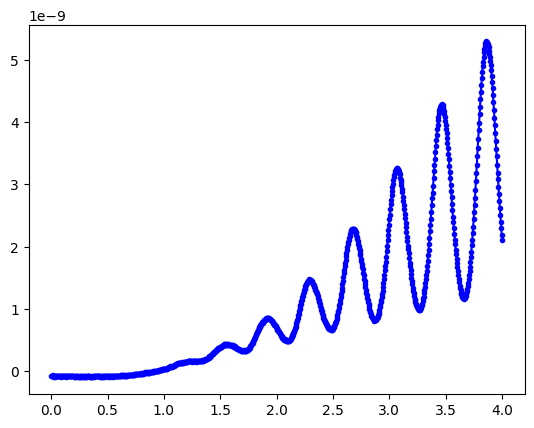

In [2]:
import numpy as np
import matplotlib.pyplot as plt


V, I = np.loadtxt(r'C:\Users\F.Pampanoni\OneDrive - University of Pisa\UNIVERSITÁ\TD AVANZATO\SA - Frank Hertz\Dati_Hg\corrente_Hg_T195_OP77.txt', unpack=True)

plt.plot(V, I, '.-', color='blue')
plt.show()

## **Acquisizione in live**

Questo frammento serve per vedere in live il plot della curva IV. In particolar modo ci servirà per fare una ripresa video della misura e correlare l'andamento della corrente con il formarsi delle righe di emissione nella valvola.

In [ ]:
import tdwf
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
import numpy as np
import time


V0 = 0 # Valore iniziale
V1 = 5 # Valore finale ---> l'alimentatore ha un preamp con G = 20 ---> VG2-VG1 va da 0 a 100 V
nV = 100 #Numero di punti
npt = 8000 # Numero di punti
fs = 400e3 # Frequenza di sample --> devo scegliere npt e fs in modo da ottenere un numero intero di periodi del rumore a 50 Hz
Vv = np.linspace(V0, V1, nV)

# Accensione
ad2 = tdwf.AD2()
ad2.vdd = 5
ad2.vss = -5
#ad2.power(True)

# Connessiene e configurazione onde
wgen = tdwf.WaveGen(ad2.hdwf)
wgen.w1.func = tdwf.funcDC
wgen.w1.offs = V0
wgen.w1.start()

#  Configurazione oscilloscopio
scope = tdwf.Scope(ad2.hdwf)
scope.fs=fs
scope.npt=npt
scope.ch1.rng = 5
scope.ch1.avg = True # Mi permette di ridurre parzialmente il rumore del segnale

# -[Ciclo di misura]-----------------------------------------------------------
I = np.full((nV, 1), np.nan)

fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
fig.canvas.manager.set_window_title('Spazzata voltaggio')

#plt.pause(5)

for j in range(1):
    for ii, V in enumerate(Vv):
        wgen.w1.offs = V
        time.sleep(0.1)
        scope.sample()
        I[ii] = -np.mean(scope.ch1.vals)/1e7 # Divido per la resistenza del preamp e ottengo la corrente in microampere
        # il meno nella corrente serve per il femto che è ampl inv, con un offset

        ax1.clear()    
        ax1.plot(Vv, I*1e6, ".-", color="tab:blue")
        ax1.grid(True)
        ax1.set_xlabel("Voltaggio [V]", fontsize=12)
        ax1.set_ylabel("Corrente [$\mu$A]", fontsize=12)
        ax1.set_xlim(0, V1)

        plt.pause(0.001)

    Volt = Vv # Per convertire l'array dei voltaggi considera la calibrazione dell'alimentatore (offset e fattore di scala)

    data = np.column_stack((Volt, I))
    #np.savetxt(f'Dati_Hg\corrente_Hg_T145_OP77.txt', data, delimiter='\t')


ad2.close()

Dispositivo #1 [SN:210321ABE379, hdwf=1] connesso!
Configurazione #1
Dispositivo disconnesso.


: 

## **Chiusura comunicazione AD2**

In [ ]:
import tdwf

ad2 = tdwf.AD2()

ad2.close()

Dispositivo #1 [SN:210321ABE379, hdwf=1] connesso!
Configurazione #1
Dispositivo disconnesso.
